# Load
Here we are loading each dataset from Lab41 labs and looking at the basic info.

In [1]:
import pandas as pd
# ignore warnings
pd.options.mode.chained_assignment = None

users = pd.read_csv('BX-Users.csv',sep=';',encoding='latin-1')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [2]:
books = pd.read_csv('BX-Books.csv',sep=';',error_bad_lines=False,encoding='latin-1')
books.head()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\Scott\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
ratings = pd.read_csv('BX-Book-Ratings.csv',sep=';',encoding='latin-1')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Merge and Explore
Now that we see the info, we can:
- remove the unwanted columns
- rename columns for ease of use
- merge the 3 datasets into 1

In [4]:
from sklearn.preprocessing import LabelEncoder

df = pd.merge(ratings,books,on='ISBN')
df.rename(columns={'User-ID':'user_id','Book-Rating':'rating','Book-Title':'title'},inplace=True)
df.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1,inplace=True)

df.head()

,user_id,ISBN,rating,title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


#### What are we looking at?
To get a better feel of how the data is distributed, I want to see:
- Total unique counts for each column

In [5]:
df.isnull().sum()

user_id                0
ISBN                   0
rating                 0
title                  0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

I feel comfortable ignoring these nulls. There are only 3 and not columns I'm mostly will focus on.

In [6]:
df.dtypes

user_id                 int64
ISBN                   object
rating                  int64
title                  object
Book-Author            object
Year-Of-Publication    object
Publisher              object
dtype: object

I may want to change **user_id** into a object dtype, but I won't be giving deep into users so I don't think it is necessary

In [7]:
print('Unique Counts:')
for i in df:
    print(i)
    print(df.groupby(i).user_id.count().count())
    print('')

Unique Counts:
user_id
92106

ISBN
270151

rating
11

title
241071

Book-Author
101588

Year-Of-Publication
202

Publisher
16729



My main focus is on the **user_id**, **rating**, and **title**. We see that there are 11 different ratings (0-10), ~92K users, and ~240k distinct book titles.

### Understand Spreads of Users and Books

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
fig = plt.figure()

x = df.groupby('user_id')['rating','title'].count()
x.reset_index(inplace=True)
x.title = x.title.apply(lambda x: 10 if x>9 else x)
groups = x.groupby('title').count()

C:\Users\Scott\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


C:\Users\Scott\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


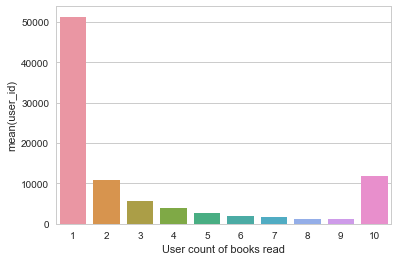

In [9]:
sns.barplot(y=groups.user_id,x=groups.index)
plt.xlabel('User count of books read')

We see that most of the people in this data have only read 1 book, which is really bad for making a recommender engine. Ideally, Everyone has read at least 2 books. The silver lining is that we are are dealing with quite a large dataset, so disqualifying some users is to my benefit.

In [10]:
x = df.groupby('title')['rating','user_id'].count()
x.reset_index(inplace=True)
x.user_id = x.user_id.apply(lambda x: 30 if x>30 else x)
groups = x.groupby('user_id').count()

C:\Users\Scott\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


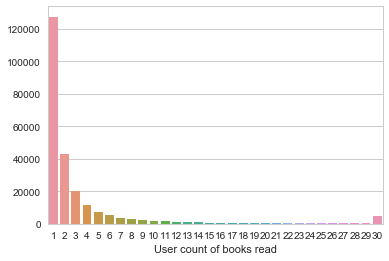

In [11]:
sns.barplot(y=groups.title.values,x=groups.index)
plt.xlabel('User count of books read')

Again, with books we notice most books are read once for this dataset. I will be using the **over 30** to keep the dataset digestible in python, and to hopefully guarantee good correlations between books.

- I want books that have been read a lot so when they are analyzed against other books the correlation between ratings is backed up by multiple instances.

## Item-Based Collaborative Filtering
I will only use:
- Books with more than 29 ratings 
- Users who have read more than 8 books

This will decrease the size of the dataset to something more digestible for python

In [12]:
# Find largely read titles
mainstreamBooks = df.groupby('title').user_id.count()
mainstreamBooks = mainstreamBooks.loc[mainstreamBooks>30]

# Find users with 8 or more ratings
mainstreamUsers = df.groupby('user_id').user_id.count()
mainstreamUsers = mainstreamUsers.loc[mainstreamUsers>8]

# Keep all instances where the title and user are in the set parameter
mainstream = df.loc[(df.title.isin(mainstreamBooks.index))&(df.user_id.isin(mainstreamUsers.index))]
mainstream = mainstream.pivot_table(columns='title',index='user_id',values='rating')

In [13]:
print(mainstream.shape)
print(len(mainstream.columns))
mainstream.head()

(12265, 4458)
4458


title,'Salem's Lot,10 Lb. Penalty,101 Dalmatians,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,24 Hours,...,Zen and the Art of Motorcycle Maintenance,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zia,Zlata's Diary: A Child's Life in Sarajevo,Zodiac: The Eco-Thriller,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",e,stardust
user_id,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0


Create a correlation matrix of books, where each correlation is based off of at least 7 instances. Meaning at least 7 people of read each book. This will help increase the chances of getting a true correlation score.

- Eg: If a correlation between 2 books has been made from just one person, I can hardly say that they know how similar those 2 books actually are. Better leave it to normality to determine which books are similar.



- PS. I'm using 7 because it seemed to be a good middle ground after testing lower and higher periods


In [14]:
corrMainstream = mainstream.corr(method='pearson',min_periods=7)
# http://deepgraph.readthedocs.io/en/latest/tutorials/pairwise_correlations.html
# Could I use deepgraph to allow for large datasets?

In [15]:
corrMainstream.head()

title,'Salem's Lot,10 Lb. Penalty,101 Dalmatians,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,24 Hours,...,Zen and the Art of Motorcycle Maintenance,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zia,Zlata's Diary: A Child's Life in Sarajevo,Zodiac: The Eco-Thriller,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",e,stardust
title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,1.0,NaN,NaN,NaN,NaN,0.138827,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Lb. Penalty,NaN,1.0,NaN,NaN,NaN,0.733689,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.071606,NaN,NaN,NaN
101 Dalmatians,NaN,NaN,1.0,NaN,NaN,-0.190949,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.258199,0.778605,NaN,NaN,NaN
16 Lighthouse Road,NaN,NaN,NaN,1.0,NaN,-0.052922,NaN,0.245952,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.142857,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,1.0,0.027650,0.071847,NaN,NaN,NaN,...,NaN,0.620288,NaN,NaN,NaN,0.336979,NaN,NaN,NaN,NaN


## Test with ***The Hobbit***
Now I will bring this all back to a real life application to see if it makes sense.

In [16]:
# Use a new df for testing
psuedo_df = df
psuedo_df.head(1)

,user_id,ISBN,rating,title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [17]:
corrMainstream.loc[corrMainstream.columns.str.contains('The Hobbit')]

title,'Salem's Lot,10 Lb. Penalty,101 Dalmatians,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,24 Hours,...,Zen and the Art of Motorcycle Maintenance,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zia,Zlata's Diary: A Child's Life in Sarajevo,Zodiac: The Eco-Thriller,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",e,stardust
title,,,,,,,,,,,,,,,,,,,,,
The Hobbit,NaN,NaN,NaN,NaN,0.667270,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Hobbit : The Enchanting Prelude to The Lord of the Rings,NaN,NaN,NaN,NaN,0.468036,-0.013547,0.317437,NaN,NaN,NaN,...,NaN,0.015696,NaN,NaN,NaN,NaN,-0.023838,NaN,NaN,NaN
The Hobbit: Or There and Back Again,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Hobbit: or There and Back Again,NaN,NaN,NaN,NaN,0.198751,0.445888,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Unfortunately We see there are multiple versions of ***The Hobbit***. An additional step would be to group all titles that are similar and create a new CorrMatrix. But for now let's assume we just want the book titled ***'The Hobbit'***

### Recommender Engine

In [18]:
def Recommender_Engine(book):
    #book needs to loosely choose a book based on regex
    
    target = corrMainstream.loc[book].dropna()
    test_df = pd.DataFrame(target)
    test_df = test_df.reset_index()
    test_df = test_df.merge(psuedo_df.loc[psuedo_df['title'].isin(test_df.title)]
                            [['Book-Author','title']].drop_duplicates(),on='title')


    for i in range(len(test_df.title)):
        author = test_df['Book-Author'].iloc[0]
        corr_col = test_df.columns[1]
        if test_df['Book-Author'].iloc[i] == author:
            test_df[corr_col][i] = test_df[corr_col][i]
        else:
            test_df[corr_col][i] = test_df[corr_col][i]**2
    test_df.rename(columns={book:'Corr'},inplace=True)
    test_df.sort_values(by='Corr',ascending=False,inplace=True)
    test_df.drop_duplicates(subset='title',inplace=True)
    return test_df.head(30)

The logic behind the recommender engine is to sort by the titles that are most correlated with the target title. Additionally, giving more weight to books that are written by the same author

In [19]:
Recommender_Engine('The Hobbit')

,title,Corr,Book-Author
82,The Hobbit,1.000000,J.R.R. TOLKIEN
50,Neuromancer (Remembering Tomorrow),0.775641,William Gibson
0,1984,0.667270,George Orwell
59,Stranger in a Strange Land (Remembering Tomorrow),0.606491,Robert A. Heinlein
6,All I Really Need to Know,0.554513,ROBERT FULGHUM
27,Four Past Midnight,0.531545,Stephen King
61,The Brethren,0.478477,John Grisham
78,The Handmaid's Tale,0.478477,Margaret Atwood
51,Nightmares &amp; Dreamscapes,0.414990,Stephen King
99,"The Two Towers (The Lord of the Rings, Part 2)",0.367074,J. R. R. Tolkien


- A lot of duplicates because of different spelling of the author

Lets fix that

In [20]:
good_authors = psuedo_df['Book-Author'].dropna()
good_authors = good_authors.str.replace('.','')
psuedo_df['Book-Author'] = good_authors.str.replace(' ','').str.lower()
df.head()

,user_id,ISBN,rating,title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,mjrose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,mjrose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,mjrose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,mjrose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,mjrose,2002,Ballantine Books


In [21]:
Recommender_Engine('The Hobbit')

,title,Corr,Book-Author
67,The Hobbit,1.000000,jrrtolkien
45,Neuromancer (Remembering Tomorrow),0.775641,williamgibson
0,1984,0.667270,georgeorwell
53,Stranger in a Strange Land (Remembering Tomorrow),0.606491,robertaheinlein
4,All I Really Need to Know,0.554513,robertfulghum
23,Four Past Midnight,0.531545,stephenking
55,The Brethren,0.478477,johngrisham
66,The Handmaid's Tale,0.478477,margaretatwood
46,Nightmares &amp; Dreamscapes,0.414990,stephenking
81,"The Two Towers (The Lord of the Rings, Part 2)",0.367074,jrrtolkien


Looks better! But I would think that other Tolkien books would be the closest related to *The Hobbit*. This may because of the specific title usage. In the future I would like to go back at redo the recommender engine with this in mind.

## Next Steps:
1. Go back and group titles into a single title and rerun the correlation matrix
    - Use NLTK stopwords to remove ununique words from titles
    - Use Regex to distect user inputted title and match to new titles (created with NLTK)
2. Find a better way to incorporate the authors into the engine
    - I don't believe I did the best of jobs penalizing books based on the authors
    - This will also need to be done with NLTK and Regex I suspect
3. Find a way to create a less RAM intensive correlation matrix (my computer hates me now) 
    - DeepGraph may have a solution for this
    -http://deepgraph.readthedocs.io/en/latest/tutorials/pairwise_correlations.html